In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devasmitakundu","key":"a14519073b516af57fe1cc7b32a0035a"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 98% 646M/658M [00:07<00:00, 108MB/s] 
100% 658M/658M [00:07<00:00, 92.7MB/s]


In [ ]:
!unzip plantdisease

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import torch
import torchvision.models as models
!pip install timm==0.6.13
import timm
from fastai.data.external import *
from fastai.vision.all import *
!pip install -q fastkaggle
from fastkaggle import *
import os
from os import listdir
import shutil

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
def move_folders_with_os(source_folder, destination_folder):
    try:
        # Create destination folder if it doesn't exist
        if not os.path.exists(destination_folder):
            os.makedirs(destination_folder)

        # Move folders using os.rename
        os.rename(source_folder, os.path.join(destination_folder, os.path.basename(source_folder)))

        print(f"Folders moved successfully from '{source_folder}' to '{destination_folder}'.")
    except FileNotFoundError:
        print(f"Error: Folder '{source_folder}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
path = "/content/Tomato"

In [ ]:
move_folders_with_os('/content/PlantVillage/Tomato_Bacterial_spot', path)
move_folders_with_os('/content/PlantVillage/Tomato_Early_blight', path)
move_folders_with_os('/content/PlantVillage/Tomato_Late_blight', path)
move_folders_with_os('/content/PlantVillage/Tomato_Leaf_Mold', path)
move_folders_with_os('/content/PlantVillage/Tomato_Septoria_leaf_spot', path)
move_folders_with_os('/content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite', path)
move_folders_with_os('/content/PlantVillage/Tomato__Target_Spot', path)
move_folders_with_os('/content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus', path)
move_folders_with_os('/content/PlantVillage/Tomato__Tomato_mosaic_virus', path)
move_folders_with_os('/content/PlantVillage/Tomato_healthy', path)

Folders moved successfully from '/content/PlantVillage/Tomato_Bacterial_spot' to '/content/Tomato'.
Folders moved successfully from '/content/PlantVillage/Tomato_Early_blight' to '/content/Tomato'.
Folders moved successfully from '/content/PlantVillage/Tomato_Late_blight' to '/content/Tomato'.
Folders moved successfully from '/content/PlantVillage/Tomato_Leaf_Mold' to '/content/Tomato'.
Folders moved successfully from '/content/PlantVillage/Tomato_Septoria_leaf_spot' to '/content/Tomato'.
Folders moved successfully from '/content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite' to '/content/Tomato'.
Folders moved successfully from '/content/PlantVillage/Tomato__Target_Spot' to '/content/Tomato'.
Folders moved successfully from '/content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus' to '/content/Tomato'.
Folders moved successfully from '/content/PlantVillage/Tomato__Tomato_mosaic_virus' to '/content/Tomato'.
Folders moved successfully from '/content/PlantVillage/Tomato_he

In [ ]:
os.listdir(path)

['Tomato__Target_Spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_healthy',
 'Tomato_Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Bacterial_spot']

In [ ]:
directory_root = "/content/Tomato"

In [ ]:
os.listdir('/content/Tomato/Tomato_healthy')

['6c46af84-675e-4e35-8309-169c20ae8b62___RS_HL 0383.JPG',
 'f0037c61-001d-4b1f-b794-5b5ab49d50d5___RS_HL 0527.JPG',
 'bcf2a4c7-5e73-4443-b39c-74fd6895afb5___GH_HL Leaf 248.1.JPG',
 '0cfee8b1-5de4-4118-9e25-f9c37bb6f17e___GH_HL Leaf 252.JPG',
 '3a48952b-cb72-4678-baca-d622971c78d0___RS_HL 9877.JPG',
 '522cba8a-8cf7-4d39-a73e-0602ab6fc71f___RS_HL 0288.JPG',
 '9c3ad610-7677-4f3c-9646-88069e0c61cb___GH_HL Leaf 449.2.JPG',
 '879b48e5-11f8-4989-8226-08af79bd6eb1___RS_HL 0453.JPG',
 '09c0d78a-c9ca-4dc4-aa10-e25530890b20___GH_HL Leaf 424.1.JPG',
 '01700b46-3800-46c6-ab81-09a5f50af525___RS_HL 0108.JPG',
 '42e607e9-916c-470c-a17d-ec5348a40ded___RS_HL 0373.JPG',
 '0576ef4b-c843-4dfb-b148-c917f7d605b7___GH_HL Leaf 299.JPG',
 '55204bbf-7eb5-488c-bcbd-e13f81953b57___RS_HL 0021.JPG',
 '6e1abdb8-4020-48c9-9488-2d320e8d5a4d___RS_HL 0168.JPG',
 'af78f888-bd62-44bb-8223-6be0cf0950fc___GH_HL Leaf 491.JPG',
 'c5708e70-747e-44d9-ab7f-356157bfe0ec___RS_HL 9813.JPG',
 '148e32de-8876-45d9-92c5-43c17d7292fa___R

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(image_directory)
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

In [ ]:
def remove_prefix_from_subfolders(folder_path, prefix="Tomato_"):
    try:
        # Get a list of all items in the folder
        items = os.listdir(folder_path)

        # Iterate through each item
        for item in items:
            item_path = os.path.join(folder_path, item)

            # Check if the item is a folder and starts with the prefix
            if os.path.isdir(item_path) and item.startswith(prefix):
                new_name = item[len(prefix):]
                new_path = os.path.join(folder_path, new_name)

                # Rename the folder
                os.rename(item_path, new_path)
                print(f"Renamed folder '{item}' to '{new_name}'")

        print("All subfolders renamed successfully.")

    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
remove_prefix_from_subfolders(path)

Renamed folder 'Tomato_Spider_mites_Two_spotted_spider_mite' to 'Spider_mites_Two_spotted_spider_mite'
Renamed folder 'Tomato_healthy' to 'healthy'
Renamed folder 'Tomato_Early_blight' to 'Early_blight'
Renamed folder 'Tomato_Tomato_mosaic_virus' to 'Tomato_mosaic_virus'
Renamed folder 'Tomato_Late_blight' to 'Late_blight'
Renamed folder 'Tomato_Target_Spot' to 'Target_Spot'
Renamed folder 'Tomato_Tomato_YellowLeaf__Curl_Virus' to 'Tomato_YellowLeaf__Curl_Virus'
Renamed folder 'Tomato_Leaf_Mold' to 'Leaf_Mold'
Renamed folder 'Tomato_Septoria_leaf_spot' to 'Septoria_leaf_spot'
Renamed folder 'Tomato_Bacterial_spot' to 'Bacterial_spot'
All subfolders renamed successfully.


In [ ]:
def limit_images_in_subfolders(folder_path, max_images=900):
    try:
        # Get a list of all subfolders in the main folder
        subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

        for subfolder in subfolders:
            # Get a list of all images in the subfolder
            images = [f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f))]

            # Check if the number of images exceeds the max_images limit
            if len(images) > max_images:
                # Sort the images (optional, can be sorted by name or modification date)
                images.sort()

                # Remove the excess images
                for image in images[max_images:]:
                    os.remove(os.path.join(subfolder, image))
                    print(f"Removed image: {os.path.join(subfolder, image)}")

        print("Image limiting operation completed successfully.")

    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
limit_images_in_subfolders(path)

Streaming output truncated to the last 5000 lines.
Removed image: /content/Tomato/Tomato_YellowLeaf__Curl_Virus/452ec0ff-9e6f-4b1e-8c35-52601cafb9f7___UF.GRC_YLCV_Lab 01516.JPG
Removed image: /content/Tomato/Tomato_YellowLeaf__Curl_Virus/45415a6c-ce63-417e-8f3f-28ee9681e336___YLCV_GCREC 5504.JPG
Removed image: /content/Tomato/Tomato_YellowLeaf__Curl_Virus/45512956-577c-451b-9f04-e18fab013fe8___YLCV_GCREC 2131.JPG
Removed image: /content/Tomato/Tomato_YellowLeaf__Curl_Virus/4566acc7-1cb8-4e83-8d87-6e7e2051fdef___UF.GRC_YLCV_Lab 09384.JPG
Removed image: /content/Tomato/Tomato_YellowLeaf__Curl_Virus/45760f36-c7f6-4e07-aefa-b1ca27a4bc54___UF.GRC_YLCV_Lab 01862.JPG
Removed image: /content/Tomato/Tomato_YellowLeaf__Curl_Virus/457a69a1-8599-4401-bda6-3f295011ff44___UF.GRC_YLCV_Lab 03111.JPG
Removed image: /content/Tomato/Tomato_YellowLeaf__Curl_Virus/45905c3d-0614-4ae5-ae8e-7d0f3589bea6___YLCV_GCREC 2199.JPG
Removed image: /content/Tomato/Tomato_YellowLeaf__Curl_Virus/459c7e33-9780-4af1-b373-

In [ ]:
tomato_dls = ImageDataLoaders.from_folder(path, seed=42, valid_pct=0.3,  item_tfms=Resize(224, method='squish'))

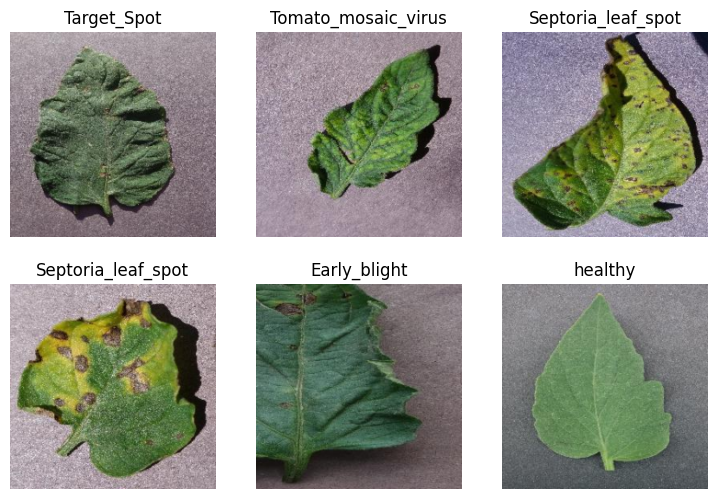

In [ ]:
tomato_dls.show_batch(max_n=6)

In [ ]:
learn_vit = vision_learner(tomato_dls, 'vit_small_r26_s32_224', metrics=accuracy).to_fp16()

In [ ]:
learn_vit.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.174083,0.241676,0.919717,00:37


epoch,train_loss,valid_loss,accuracy,time
0,0.288992,0.099330,0.971665,00:48
1,0.137185,0.071291,0.977174,00:45
2,0.078356,0.059985,0.983865,00:46


SuggestedLRs(valley=5.754399353463668e-06)

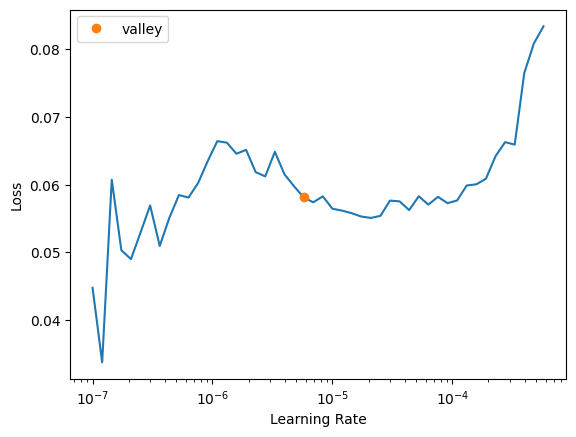

In [ ]:
learn_vit.lr_find()

In [ ]:
from huggingface_hub import HfApi, HfFolder, Repository, notebook_login, push_to_hub_fastai

In [ ]:
notebook_login()

In [ ]:
repo_id = "Luna-Skywalker/tomato_dtect_v2"

push_to_hub_fastai(learner=learn_vit, repo_id=repo_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.pkl:   0%|          | 0.00/145M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Luna-Skywalker/tomato_dtect_v2/commit/5bf81ed4038ee3ef782593c453a1544c3ce45956', commit_message='Push FastAI model using huggingface_hub.', commit_description='', oid='5bf81ed4038ee3ef782593c453a1544c3ce45956', pr_url=None, pr_revision=None, pr_num=None)